In [53]:
import requests
from bs4 import BeautifulSoup

# from google.colab import files

url_req_ = (['?imei=350424060069364&s_dt=2022-08-10%2011:50:00&e_dt=2022-08-10%2015:00:00',
            '?imei=352094089278805&s_dt=2022-08-10%2011:50:00&e_dt=2022-08-10%2015:00:00'])

url_req = (['?imei=350424060069364&s_dt=2022-08-16%2011:13:00&e_dt=2022-08-16%2017:30:00',
            '?imei=359632102795827&s_dt=2022-08-16%2011:13:00&e_dt=2022-08-16%2017:30:00'])


web_link = 'https://nav.by/info/testAccel.php'

db_files = []

### postman
import requests

url = "https://nav.by/login_get_data.php?type=LOGIN&data%5Blogin%5D=diler_el_vek&data%5Bpwd%5D=111111&data%5BscreenWidth%5D=1920&data%5BscreenHeight%5D=1080"

payload = {}
headers = {
    'Cookie': 'pc_id=60b9bbc0-bef7-4c4b-9052-003672c5d1a9; ses_id=15fb4b00-046b-4e59-bd88-175381dd03b8'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)


### postman

def remove_str(value, deletechars_):
    for c in deletechars_:
        value = value.replace(c, '_')
    return value


NUM_OF_FILES = len(url_req)
for p in range(NUM_OF_FILES):

    name_of_file = remove_str(url_req[p], '\/:*?"<>|&%=-')
    db_files.append(name_of_file)

    print(name_of_file)

    file = open(name_of_file + ".csv", "w")
    file.close()

    response = requests.request("GET", web_link + url_req[p], headers=headers, data=payload)
    soup = BeautifulSoup(response.text, 'lxml')

    file = open(name_of_file + ".csv", "a+")

    quotes = soup.find_all('p')
    for quote in quotes:
        file.write(quote.text)
    file.close()

    file = open(name_of_file + ".csv", "r")
    lines = file.readlines()
    file.close()

    f_first_line = 1

    file = open(name_of_file + ".csv", "w")
    for line in lines:
        if f_first_line == 1:
            file.write(line)
            f_first_line = 0
        if ((
                line != "date;speed;78;64011;64022;64033;64044;delta64011;delta64022;delta64033;delta64044;vodo;lat;lon;dir;alt;engine_speed;distance_gps;201;202;203;204;210;211;212;213;214;215;ain1;ain2;151\n") and (
                line != "\n")):
            file.write(line)

    file.close()

{"url":".\/info\/help.php","exitCode":0}
_imei_350424060069364_s_dt_2022_08_16_2011_13_00_e_dt_2022_08_16_2017_30_00
_imei_359632102795827_s_dt_2022_08_16_2011_13_00_e_dt_2022_08_16_2017_30_00


In [54]:
# import pandas as pd
# from datetime import datetime
#
# df = pd.read_csv(db_files[0] + '.csv', sep=';', engine='python', decimal=',')
# df.columns = ['date', 'speed', 'rowdata', 'z', 'y', 'x_m', 'x_p', 'delta64011', 'delta64022', 'delta64033',
#               'delta64044', 'vodo', 'lat', 'lon', 'dir', 'alt', 'engine_speed', 'distance_gps', 'sum_ES',
#               'mark_ind1', 'sum_ES_APP', 'mark_ind2', 'sum_ES_2_APP', 'mark_ind3', 'sum_ES_APP_2', 'mark_ind4',
#               'sum_ES_2_APP_2', 'mark_ind5', 'AnIn1', 'AnIn2', 'CAN1']
#
# df_ = pd.read_csv(db_files[1] + '.csv', sep=';', engine='python', decimal=',')
# df_.columns = ['date', 'speed', 'rowdata', 'z', 'y', 'x_m', 'x_p', 'delta64011', 'delta64022', 'delta64033',
#               'delta64044', 'vodo', 'lat', 'lon', 'dir', 'alt', 'engine_speed', 'distance_gps', 'sum_ES',
#               'mark_ind1', 'sum_ES_APP', 'mark_ind2', 'sum_ES_2_APP', 'mark_ind3', 'sum_ES_APP_2', 'mark_ind4',
#               'sum_ES_2_APP_2', 'mark_ind5', 'AnIn1', 'AnIn2', 'CAN1']
#
# k = 0
#
# for i in range(2, len(df)):
#     while datetime.strptime(df.date[i], "%Y-%m-%d %H:%M:%S.%f") > datetime.strptime(df_.date[k], "%Y-%m-%d %H:%M:%S.%f"):
#         k += 1
#     df.at[i, 'sum_ES'] = df_.sum_ES[k]
#     df.at[i, 'sum_ES_APP'] = df_.sum_ES_APP[k]
#     df.at[i, 'sum_ES_2_APP'] = df_.sum_ES_2_APP[k]
#     df.at[i, 'sum_ES_APP_2'] = df_.sum_ES_APP_2[k]
#     df.at[i, 'sum_ES_2_APP_2'] = df_.sum_ES_2_APP_2[k]
#
# df.to_csv(db_files[0] + '_changed' + '.csv', index=False)

In [55]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

import seaborn as sns
from array import array

sns.set(style="darkgrid")

In [56]:
from scipy.optimize import curve_fit

# initial guesses for k1, k2, k3, k4, k5, k6:
kfc3_init = 1.0, 1.0, 1.0, 1.0

def func3_fuel_consumption(x, k2, k3, k4, k5):
    delta_es_app_, delta_es_2_app_, delta_es_app_2_, delta_es_2_app_2_ = x
    return k2 * delta_es_app_ + k3 * delta_es_2_app_ + k4 * delta_es_app_2_ + k5 * delta_es_2_app_2_

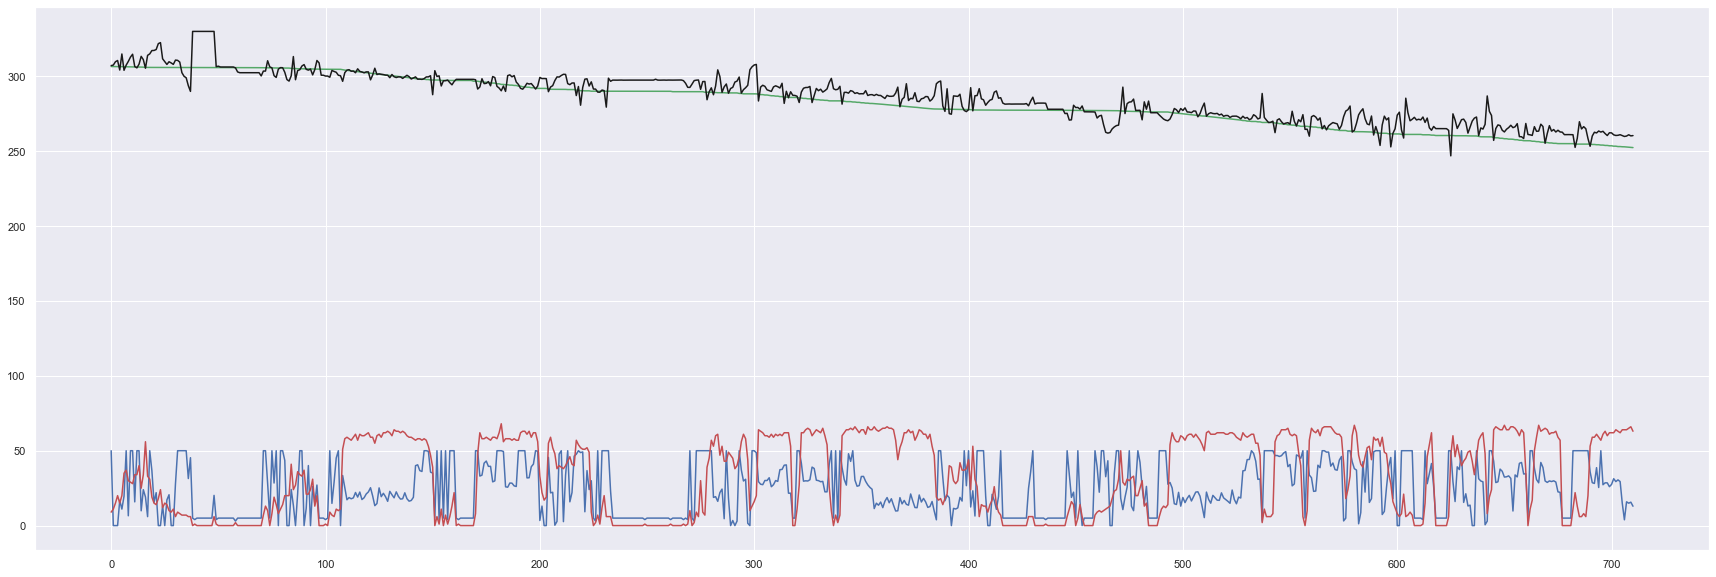

In [58]:
delta_ES = []
delta_ES_APP = []
delta_ES_2_APP = []
delta_ES_APP_2 = []
delta_ES_2_APP_2 = []

inst_cons = []
inst_speed = []
inst_acc_plus = []
inst_acc_minus = []
dut_rf = []
dut = []

popt3_calc = [0.003276728, -0.008181688, 0.004813692, -3.33334E-05]

df = pd.read_csv(db_files[0] + '.csv', sep=';', engine='python', decimal=',')
df.columns = ['date', 'speed', 'rowdata', 'z', 'y', 'x_m', 'x_p', 'delta64011', 'delta64022', 'delta64033',
              'delta64044', 'vodo', 'lat', 'lon', 'dir', 'alt', 'engine_speed', 'distance_gps', 'sum_ES',
              'mark_ind1', 'sum_ES_APP', 'mark_ind2', 'sum_ES_2_APP', 'mark_ind3', 'sum_ES_APP_2', 'mark_ind4',
              'sum_ES_2_APP_2', 'mark_ind5', 'AnIn1', 'AnIn2', 'CAN1']

df_ = pd.read_csv(db_files[1] + '.csv', sep=';', engine='python', decimal=',')
df_.columns = ['date', 'speed', 'rowdata', 'z', 'y', 'x_m', 'x_p', 'delta64011', 'delta64022', 'delta64033',
              'delta64044', 'vodo', 'lat', 'lon', 'dir', 'alt', 'engine_speed', 'distance_gps', 'sum_ES',
              'mark_ind1', 'sum_ES_APP', 'mark_ind2', 'sum_ES_2_APP', 'mark_ind3', 'sum_ES_APP_2', 'mark_ind4',
              'sum_ES_2_APP_2', 'mark_ind5', 'AnIn1', 'AnIn2', 'CAN1']

k = 0

df["consum_l"] = 0.0
df["consum_t"] = 0.0
df["dut_calc"] = 0.0

sum_ES_sum = 0
sum_ES_APP_sum = 0
sum_ES_2_APP_sum = 0
sum_ES_APP_2_sum = 0
sum_ES_2_APP_2_sum = 0

AnIn1_begin = 0

sum_ES_prev = 0
sum_ES_APP_prev = 0
sum_ES_2_APP_prev = 0
sum_ES_APP_2_prev = 0
sum_ES_2_APP_2_prev = 0
AnIn1_prev = 0

sum_ES_inst = 0
sum_ES_APP_inst = 0
sum_ES_2_APP_inst = 0
sum_ES_APP_2_inst = 0
sum_ES_2_APP_2_inst = 0

sum_ES_dist = 0
sum_ES_APP_dist = 0
sum_ES_2_APP_dist = 0
sum_ES_APP_2_dist = 0
sum_ES_2_APP_2_dist = 0

dut_begine = df.AnIn1[0]

for i in range(2, len(df)):

    while datetime.strptime(df.date[i], "%Y-%m-%d %H:%M:%S.%f") > datetime.strptime(df_.date[k], "%Y-%m-%d %H:%M:%S.%f"):
        k += 1
    df.at[i, 'sum_ES'] = df_.sum_ES[k]
    df.at[i, 'sum_ES_APP'] = df_.sum_ES_APP[k]
    df.at[i, 'sum_ES_2_APP'] = df_.sum_ES_2_APP[k]
    df.at[i, 'sum_ES_APP_2'] = df_.sum_ES_APP_2[k]
    df.at[i, 'sum_ES_2_APP_2'] = df_.sum_ES_2_APP_2[k]

    if df.sum_ES[i] > sum_ES_prev:
        sum_ES_inst = df.sum_ES[i] - sum_ES_prev
        sum_ES_sum += sum_ES_inst
    else:
        sum_ES_dist += df.distance_gps[i]
    sum_ES_prev = df.sum_ES[i]

    if df.sum_ES_APP[i] > sum_ES_APP_prev:
        sum_ES_APP_inst = df.sum_ES_APP[i] - sum_ES_APP_prev
        sum_ES_APP_sum += sum_ES_APP_inst
    sum_ES_APP_prev = df.sum_ES_APP[i]

    if df.sum_ES_2_APP[i] > sum_ES_2_APP_prev:
        sum_ES_2_APP_inst = df.sum_ES_2_APP[i] - sum_ES_2_APP_prev
        sum_ES_2_APP_sum += sum_ES_2_APP_inst
    sum_ES_2_APP_prev = df.sum_ES_2_APP[i]

    if df.sum_ES_APP_2[i] > sum_ES_APP_2_prev:
        sum_ES_APP_2_inst = df.sum_ES_APP_2[i] - sum_ES_APP_2_prev
        sum_ES_APP_2_sum += sum_ES_APP_2_inst
    sum_ES_APP_2_prev = df.sum_ES_APP_2[i]

    if df.sum_ES_2_APP_2[i] > sum_ES_2_APP_2_prev:
        sum_ES_2_APP_2_inst = df.sum_ES_2_APP_2[i] - sum_ES_2_APP_2_prev
        sum_ES_2_APP_2_sum += sum_ES_2_APP_2_inst
    sum_ES_2_APP_2_prev = df.sum_ES_2_APP_2[i]

    consum_l = 0
    consum_t = 0

    if df.distance_gps[i] != 0:
        consum_l = (3/5)*(1/df.distance_gps[i])*func3_fuel_consumption(
            (sum_ES_APP_inst, sum_ES_2_APP_inst, sum_ES_APP_2_inst, sum_ES_2_APP_2_inst),
            popt3_calc[0], popt3_calc[1], popt3_calc[2], popt3_calc[3])
    if consum_l > 0.5:
        consum_l = 0.5
    if consum_l < 0:
        consum_l = 0
    if df.speed[i] < 5:
        consum_l = (5 - df.speed[i])/100
    df.at[i, 'consum_l'] = consum_l

    if df.AnIn1[i] > (df.AnIn1[i -1] + 50):
        dut_begine = df.AnIn1[i]

    dut_calc = dut_begine +25 - func3_fuel_consumption(
            (sum_ES_APP_sum, sum_ES_2_APP_sum, sum_ES_APP_2_sum, sum_ES_2_APP_2_sum),
            popt3_calc[0], popt3_calc[1], popt3_calc[2], popt3_calc[3])
    df.at[i, 'dut_calc'] = dut_calc

    d_time = (datetime.strptime(df.date[i], "%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(df.date[i-1], "%Y-%m-%d %H:%M:%S.%f")).seconds
    if d_time != 0:
        consum_t = (1/d_time)*func3_fuel_consumption(
            (sum_ES_APP_inst, sum_ES_2_APP_inst, sum_ES_APP_2_inst, sum_ES_2_APP_2_inst),
            popt3_calc[0], popt3_calc[1], popt3_calc[2], popt3_calc[3])
    df.at[i, 'consum_t'] = consum_t

    dut_rf.append(dut_calc)
    dut.append(df.AnIn1[i])
    inst_cons.append(consum_l*100)
    inst_speed.append(df.speed[i])
    acc_delta = 10*df.delta64044[i]
    if acc_delta < 0:
        acc_delta = 0
    if acc_delta > 50:
        acc_delta = 50
    inst_acc_plus.append(acc_delta)
    acc_delta = -10*df.delta64033[i]
    if acc_delta > 0:
        acc_delta = 0
    if acc_delta < -50:
        acc_delta = -50
    inst_acc_minus.append(acc_delta)

df.to_csv(db_files[0] + '_changed' + '.csv', index=False)

plt.figure(figsize=(30, 10))
plt.plot(inst_cons, 'b')
plt.plot(inst_speed, 'r')
plt.plot(dut_rf, 'g')
plt.plot(dut, 'k')
plt.show()